In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 400

In [2]:
with open('../data/series.json') as f:
    series = json.load(f)

In [3]:
df = pd.read_csv('../data/data.csv')

df = df[df['year'] == 2020]
df = df.drop('year', axis=1)
df = df.drop('country', axis=1)

df.head()

EG.CFT.ACCS.ZS  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  EG.ELC.ACCS.ZS  \
54              NaN                NaN                NaN      100.000000   
110       19.501837           7.599289          38.793983       45.609604   
166       33.200000          15.900000          82.600000       97.699997   
222       14.903839           2.959758          30.873764       52.082053   
278       50.200000           8.300000          77.600000       46.890610   

     EG.ELC.ACCS.RU.ZS  EG.ELC.ACCS.UR.ZS  FX.OWN.TOTL.ZS  FX.OWN.TOTL.FE.ZS  \
54          100.000000         100.000000             NaN                NaN   
110          30.163364          73.775675             NaN                NaN   
166          97.066711          99.500000             NaN                NaN   
222          25.459506          83.165402             NaN                NaN   
278                NaN          73.708916             NaN                NaN   

     FX.OWN.TOTL.MA.ZS  FX.OWN.TOTL.OL.ZS  ...  SG.VAW.REAS.ZS  \
54                 NaN                NaN  ...             NaN   
110                NaN                NaN  ...             NaN   
166                NaN                NaN  ...             NaN   
222                NaN                NaN  ...             NaN   
278                NaN                NaN  ...             NaN   

     SG.VAW.ARGU.ZS  SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  SG.VAW.NEGL.ZS  \
54              NaN             NaN             NaN             NaN   
110             NaN             NaN             NaN             NaN   
166             NaN             NaN             NaN             NaN   
222             NaN             NaN             NaN             NaN   
278             NaN             NaN             NaN             NaN   

     SG.VAW.REFU.ZS  SP.M15.2024.FE.ZS  SP.M18.2024.FE.ZS  SH.DYN.AIDS.FE.ZS  \
54              NaN                NaN                NaN                NaN   
110             NaN                NaN                NaN          60.310464   
166             NaN                NaN                NaN          29.100000   
222             NaN                NaN                NaN          62.542146   
278             NaN                NaN                NaN          67.000000   

     SH.HIV.INCD.YG  
54              NaN  
110             NaN  
166           500.0  
222             NaN  
278          5600.0  

[5 rows x 1442 columns]

In [4]:
df.isna().all()

EG.CFT.ACCS.ZS       False
EG.CFT.ACCS.RU.ZS    False
EG.CFT.ACCS.UR.ZS    False
EG.ELC.ACCS.ZS       False
EG.ELC.ACCS.RU.ZS    False
                     ...  
SG.VAW.REFU.ZS       False
SP.M15.2024.FE.ZS    False
SP.M18.2024.FE.ZS    False
SH.DYN.AIDS.FE.ZS    False
SH.HIV.INCD.YG       False
Length: 1442, dtype: bool

In [5]:
nan_cols = df.columns[df.isna().all()]
df = df.drop(nan_cols, axis=1)

In [6]:
df.head()

EG.CFT.ACCS.ZS  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  EG.ELC.ACCS.ZS  \
54              NaN                NaN                NaN      100.000000   
110       19.501837           7.599289          38.793983       45.609604   
166       33.200000          15.900000          82.600000       97.699997   
222       14.903839           2.959758          30.873764       52.082053   
278       50.200000           8.300000          77.600000       46.890610   

     EG.ELC.ACCS.RU.ZS  EG.ELC.ACCS.UR.ZS  NY.ADJ.NNTY.KD.ZG  NY.ADJ.NNTY.KD  \
54          100.000000         100.000000                NaN             NaN   
110          30.163364          73.775675          -4.999989    8.114053e+11   
166          97.066711          99.500000                NaN             NaN   
222          25.459506          83.165402           5.794022    6.928618e+11   
278                NaN          73.708916         -26.347738    6.798351e+10   

     NY.ADJ.NNTY.CD  NY.ADJ.NNTY.PC.KD.ZG  ...  SG.VAW.REAS.ZS  \
54              NaN                   NaN  ...             NaN   
110    7.520792e+11             -7.477902  ...             NaN   
166    1.851511e+10                   NaN  ...             NaN   
222    6.455144e+11              3.097360  ...             NaN   
278    3.690200e+10            -28.716038  ...             NaN   

     SG.VAW.ARGU.ZS  SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  SG.VAW.NEGL.ZS  \
54              NaN             NaN             NaN             NaN   
110             NaN             NaN             NaN             NaN   
166             NaN             NaN             NaN             NaN   
222             NaN             NaN             NaN             NaN   
278             NaN             NaN             NaN             NaN   

     SG.VAW.REFU.ZS  SP.M15.2024.FE.ZS  SP.M18.2024.FE.ZS  SH.DYN.AIDS.FE.ZS  \
54              NaN                NaN                NaN                NaN   
110             NaN                NaN                NaN          60.310464   
166             NaN                NaN                NaN          29.100000   
222             NaN                NaN                NaN          62.542146   
278             NaN                NaN                NaN          67.000000   

     SH.HIV.INCD.YG  
54              NaN  
110             NaN  
166           500.0  
222             NaN  
278          5600.0  

[5 rows x 1073 columns]

In [7]:
corr = df.corr()

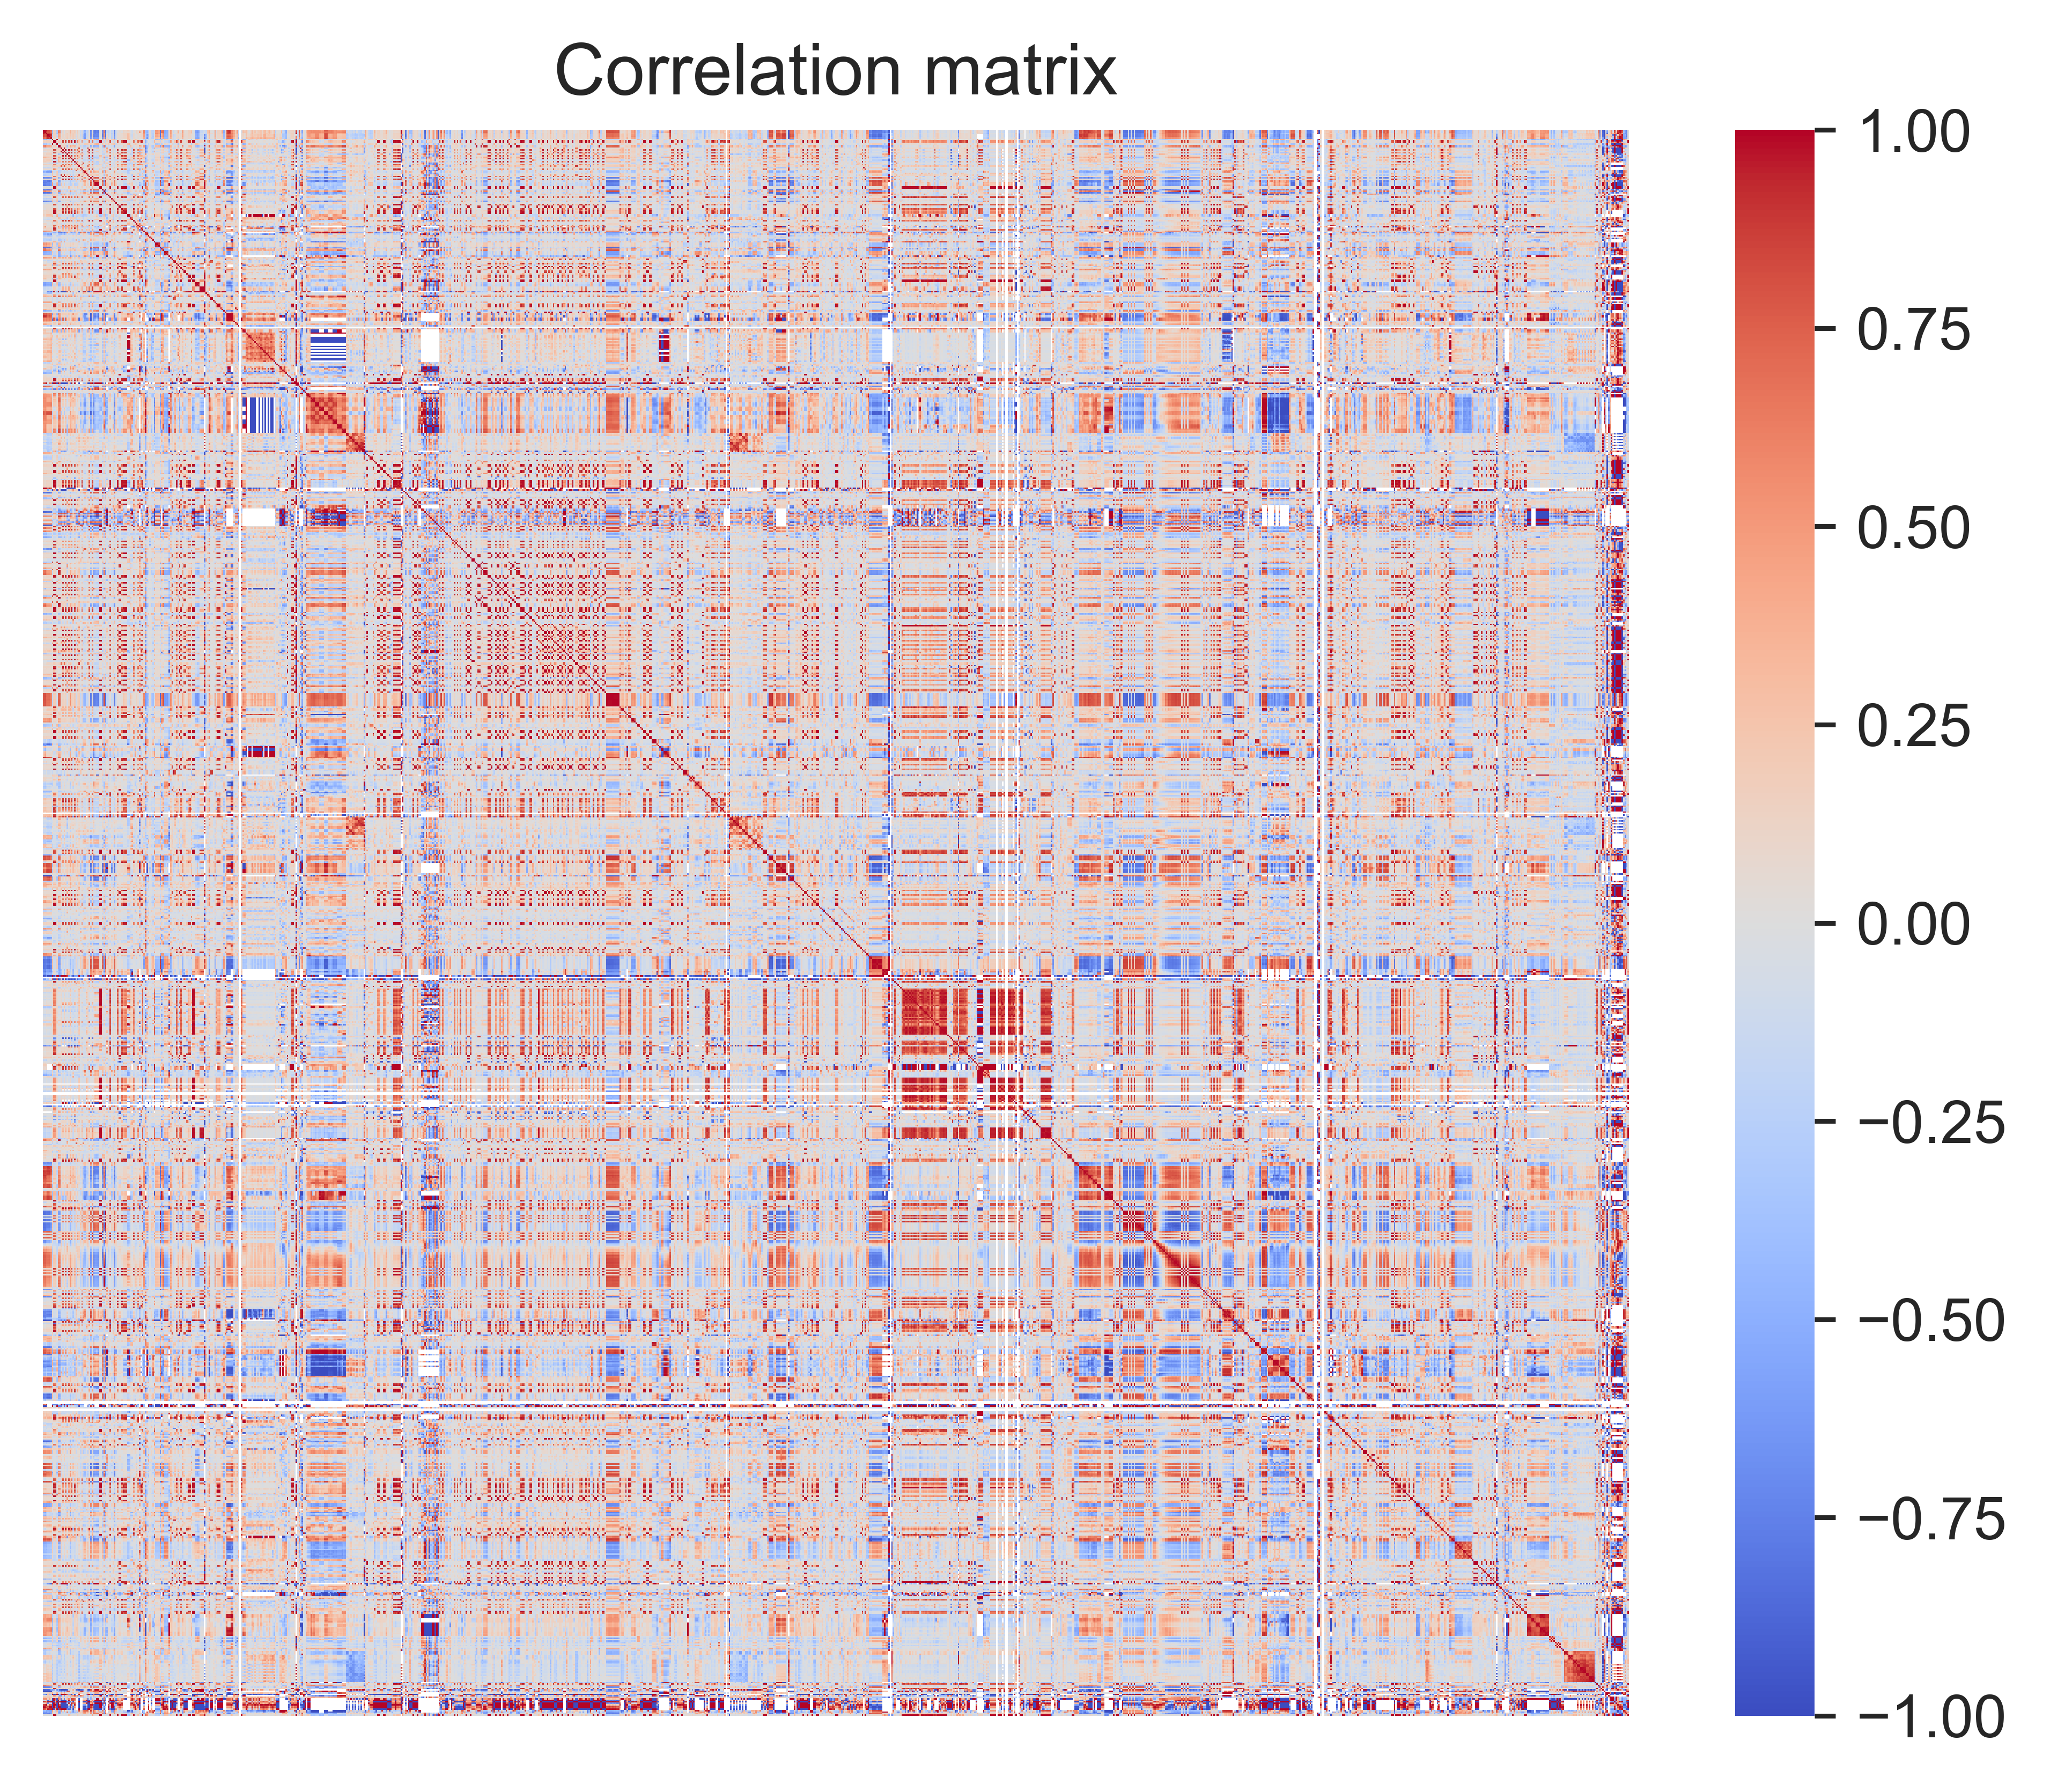

In [8]:
plt.figure(dpi=800)
sns.heatmap(corr, annot=False, cmap='coolwarm', square=True, xticklabels=[], yticklabels=[])
plt.title('Correlation matrix')
plt.savefig('correlation_matrix.png', bbox_inches='tight')
plt.show()

In [9]:
corr = df.corr()

corr.iloc[:,:] = np.tril(corr, k=-1)
corr.values[np.arange(corr.shape[0])[:,None] <= np.arange(corr.shape[0])] = np.nan

corr = corr.stack()
corr = corr[corr != np.nan]

corr

EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.ZS       0.964337
EG.CFT.ACCS.UR.ZS  EG.CFT.ACCS.ZS       0.958992
                   EG.CFT.ACCS.RU.ZS    0.877502
EG.ELC.ACCS.ZS     EG.CFT.ACCS.ZS       0.840245
                   EG.CFT.ACCS.RU.ZS    0.773854
                                          ...   
SH.HIV.INCD.YG     SG.VAW.NEGL.ZS       1.000000
                   SG.VAW.REFU.ZS      -1.000000
                   SP.M15.2024.FE.ZS   -0.277743
                   SP.M18.2024.FE.ZS    0.496438
                   SH.DYN.AIDS.FE.ZS    0.111458
Length: 552617, dtype: float64

In [10]:
bins = np.linspace(-1, 1, 21)
counts = np.zeros(len(bins) - 1)

for bin_idx in range(len(bins) - 1):
    counts[bin_idx] = ((corr > bins[bin_idx]) & (corr <= bins[bin_idx + 1])).sum().sum()

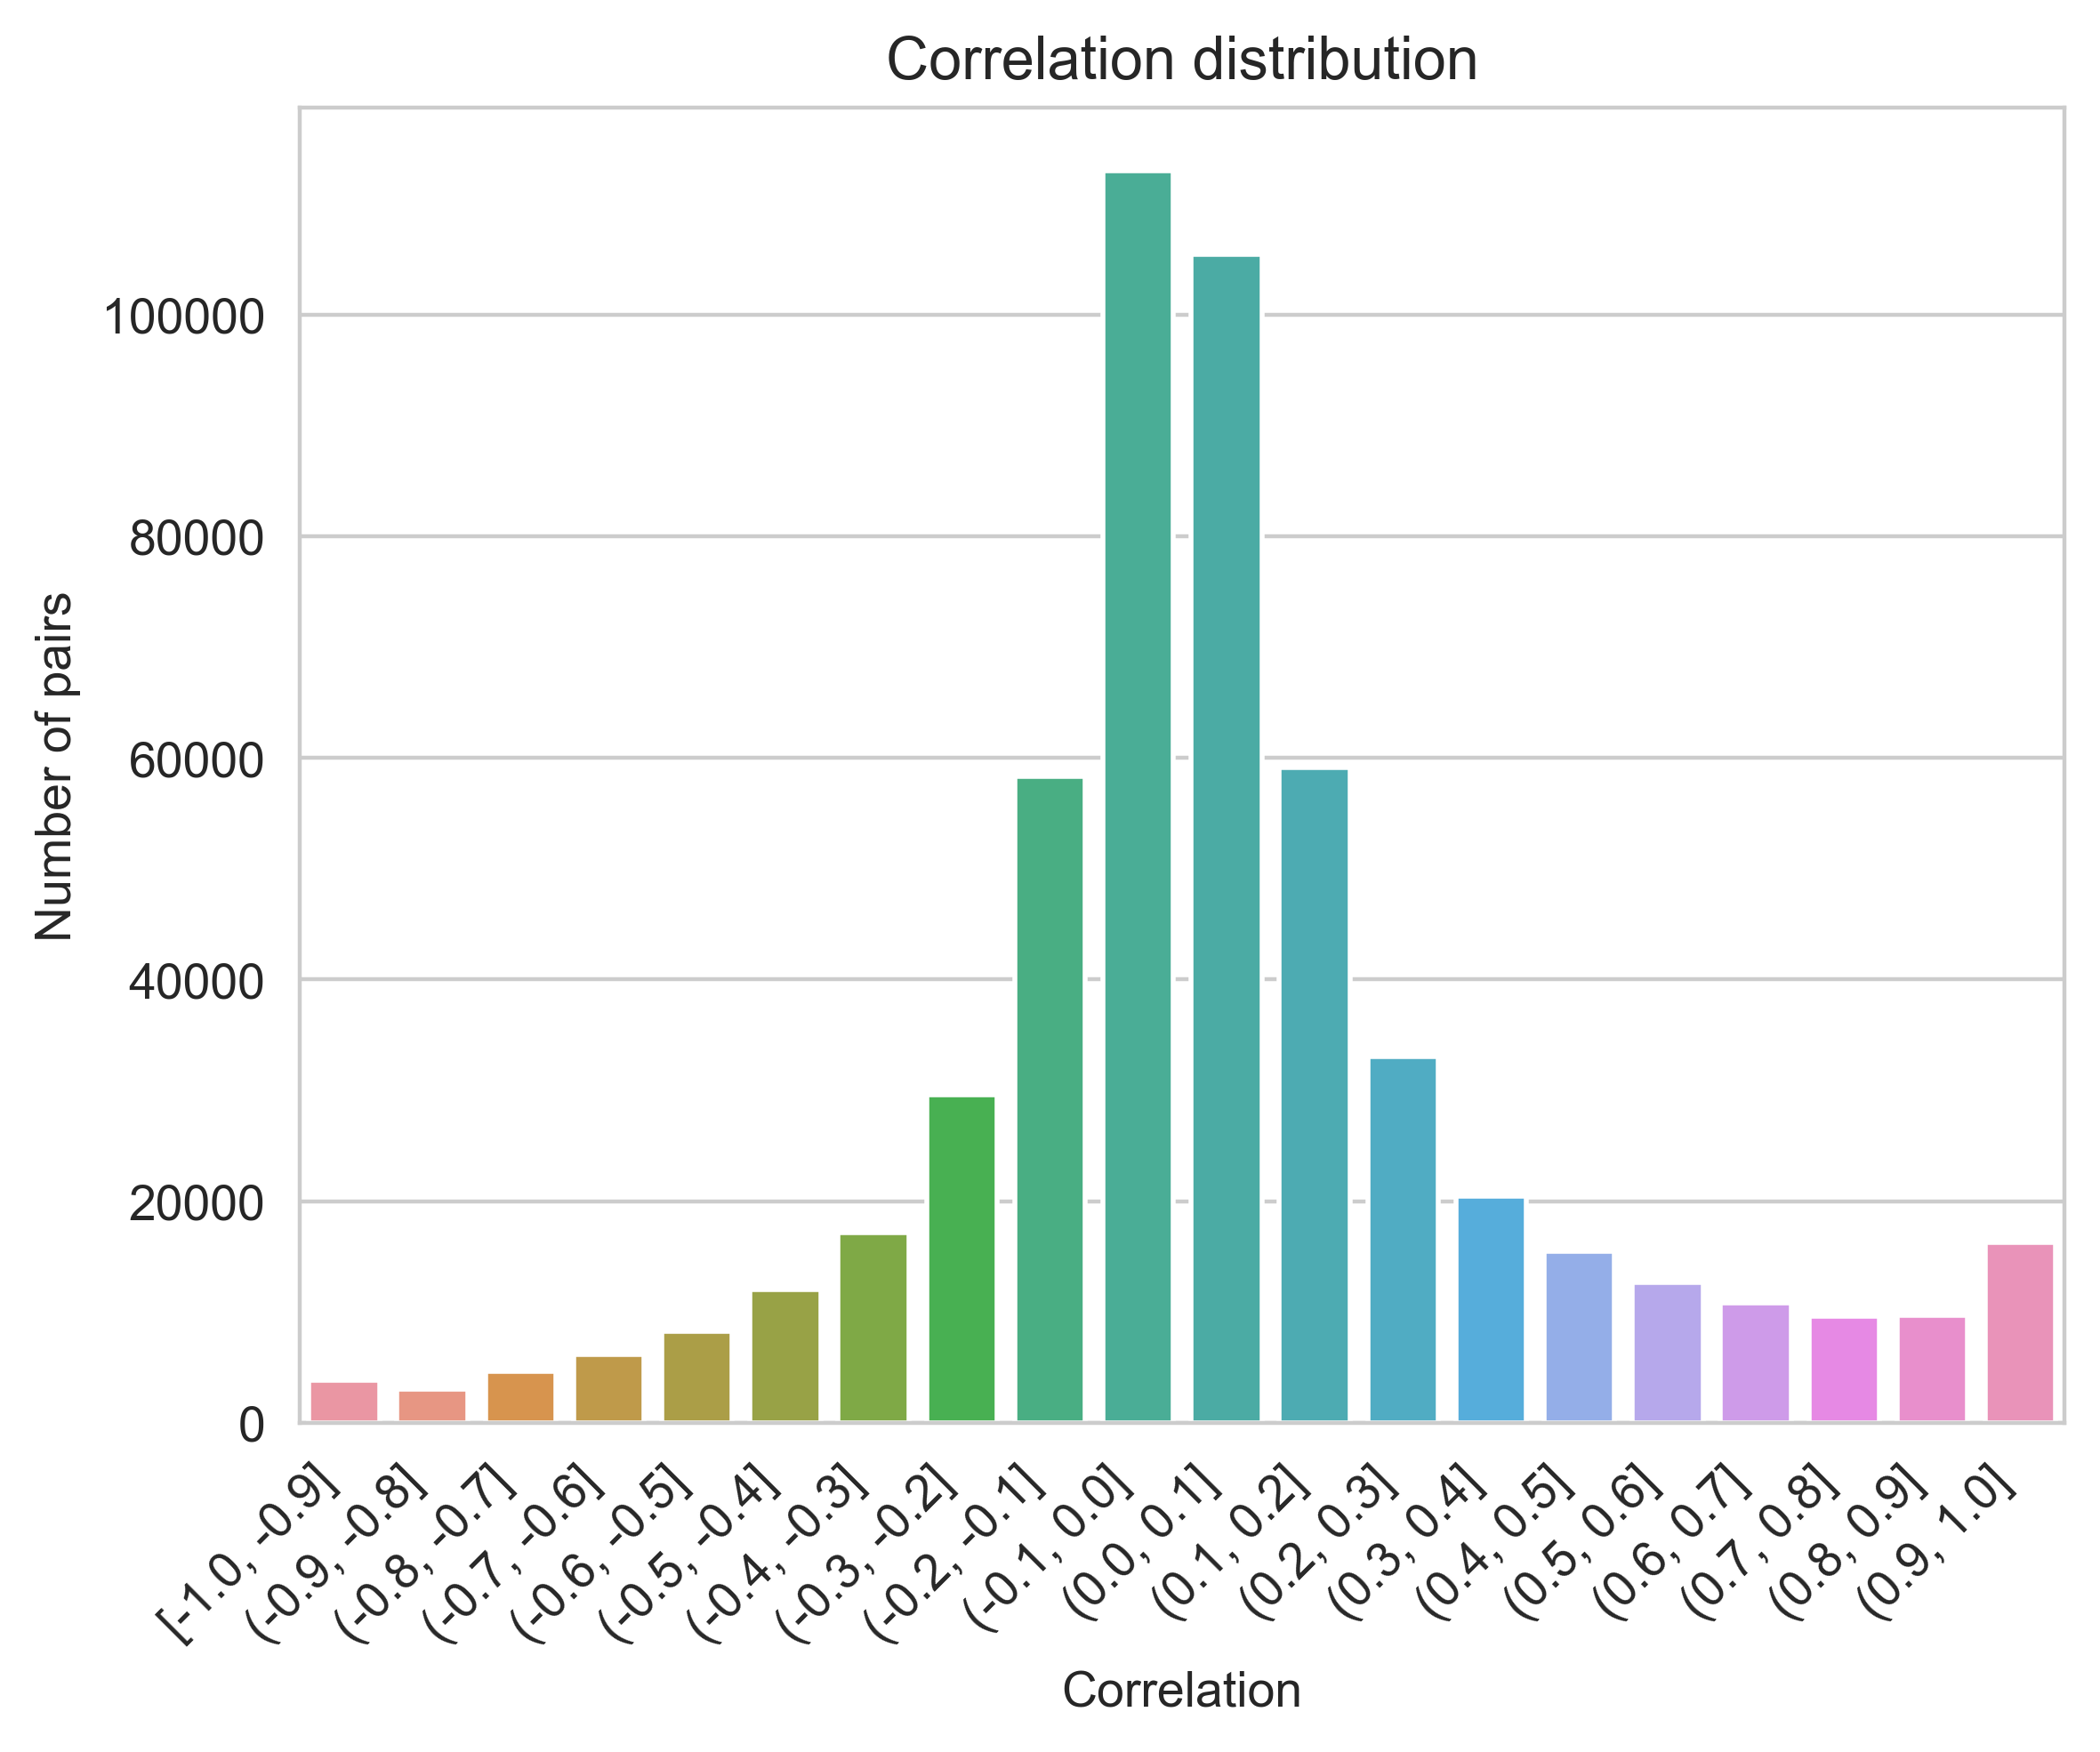

In [11]:
x = list(map(lambda x: f'({x[0]:.1f}, {x[1]:.1f}]', zip(bins, bins[1:])))
x[0] = '[' + x[0][1:]
sns.barplot(x=x, y=counts)
plt.xlabel('Correlation')
plt.ylabel('Number of pairs')
plt.title('Correlation distribution')
plt.xticks(rotation=45, ha='right')
plt.savefig('correlation_distribution.png', bbox_inches='tight')
plt.show()

In [12]:
def print_correlated_cols(c_low, c_high, n_cols=None):
    cols = corr[(corr >= c_low) & (corr <= c_high)].index

    if n_cols is not None:
        cols = cols[:n_cols]

    for c in cols:
        print(f'{series[c[0]]} - {series[c[1]]}')

In [13]:
print_correlated_cols(1, 1, 100)

Battle-related deaths (number of people) - Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)
Battle-related deaths (number of people) - Annualized average growth rate in per capita real survey mean consumption or income, total population (%)
Bribery incidence (% of firms experiencing at least one bribe payment request) - Battle-related deaths (number of people)
Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Air transport, passengers carried
Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Air transport, registered carrier departures worldwide
Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Average transaction cost of sending remittances from a specific country (%)
Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Chemicals (% of value added in manufacturing)
C

In [14]:
print_correlated_cols(-1, -1, 100)

Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Adjusted net savings, excluding particulate emission damage (% of GNI)
Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Adjusted net savings, excluding particulate emission damage (current US$)
Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Adjusted net savings, including particulate emission damage (% of GNI)
Children with fever receiving antimalarial drugs (% of children under age 5 with fever) - Arms imports (SIPRI trend indicator values)
Commercial banks and other lending (PPG + PNG) (NFL, current US$) - ARI treatment (% of children under 5 taken to a health provider)
Completeness of birth registration, rural (%) - Battle-related deaths (number of people)
Completeness of birth registration, rural (%) - Commercial banks and other lending (PPG + PNG) (NFL, current US$)
Completeness of birth registration, urban (%

In [15]:
print_correlated_cols(-0.01, 0.01, 100)

Adjusted net savings, excluding particulate emission damage (% of GNI) - Access to electricity (% of population)
Adjusted net savings, excluding particulate emission damage (% of GNI) - Adjusted net national income (current US$)
Adjusted savings: carbon dioxide damage (% of GNI) - Adjusted net national income (constant 2015 US$)
Adjusted savings: carbon dioxide damage (% of GNI) - Adjusted net savings, including particulate emission damage (current US$)
Adjusted savings: consumption of fixed capital (current US$) - Adjusted net savings, excluding particulate emission damage (% of GNI)
Adjusted savings: education expenditure (current US$) - Adjusted net national income (annual % growth)
Adjusted savings: energy depletion (current US$) - Adjusted net national income per capita (annual % growth)
Adjusted savings: energy depletion (current US$) - Adjusted net savings, excluding particulate emission damage (% of GNI)
Adjusted savings: energy depletion (current US$) - Adjusted net savings, i